# Анализ факторов успешности видеоигр: рекомендации для стратегического планирования рекламных кампаний

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Для проведения анализа потребуется выполнить следующие основные задачи:
- выполнить предобработку данных
- выполнить исследовательский анализ данных
- составить портрет пользователя каждого региона
- проверить гипотезы
- написать общий вывод

В ходе предобработки данных потребуется привести названия столбцов к нижнему регистру, преобразовать данные в нужные типы, обработать пропуски и посчитать суммарные продажи.

Во время выполнения исследовательского анализа необходимо исследовать выпуск игр по годам, по платформам, выбрать актуальный период для последующего анализа, определить наиболее перспективную платформу, изучить влияние отзывов ккритиков и простых покупателей, найти наиболее популярные жанры.

Портрет пользователя каждого региона включает в себя самые популярные платформы и жанры для каждого региона, а также учитывает влияние рейтинга ERSB на продажи в этих регионах.

Необходимо проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также гипотезу о различие средних пользовательских рейтингов жанров Action и Sports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

##### Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм

In [2]:
data = pd.read_csv('/datasets/games.csv')

##### Изучим общую информацию о датафрейме

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Можно заметить, что есть проблема с пропусками. Столбцы `Critic_Score`, `User_Score`, и `Rating` содержат большое количество пропущенных значений. Например, в столбце `Critic_Score` заполнено только 8137 значений из 16715, что составляет менее половины данных.

#### Шаг 2. Предобработка данных

##### Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()

##### Преобразуем данные в нужные типы

Изменим тип данных в `year_of_release` на int64, так как год может быть только целым числом (Использую Int64, так как в столбце присутствуют пропуски, которые не могут быть напрямую преобразованы в целочисленный тип int).

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Нужно изменить тип столбца `user_score`, он отображает оценки пользлователей от 0 до 10 (В данном слобце присутствовали tbd -  to be determined, они были заменены на NaN).

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Столбец `rating`  нужно изменить на формат category, так как рейтинг выставляется категориями, это также уменьшить объем памяти

In [8]:
data['rating'] = data['rating'].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


##### Обработуем пропуски

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0: 'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19, 6), color = 'skyblue', edgecolor = 'black', legend = False, fontsize = 14)
            .set_title('Процент пропущенных значений по столбцам' + "\n", fontsize = 20, color = 'Black', pad=20) 
        )
    except:
        print('Пропусков не осталось :) или произошла ошибка в первой части функции')

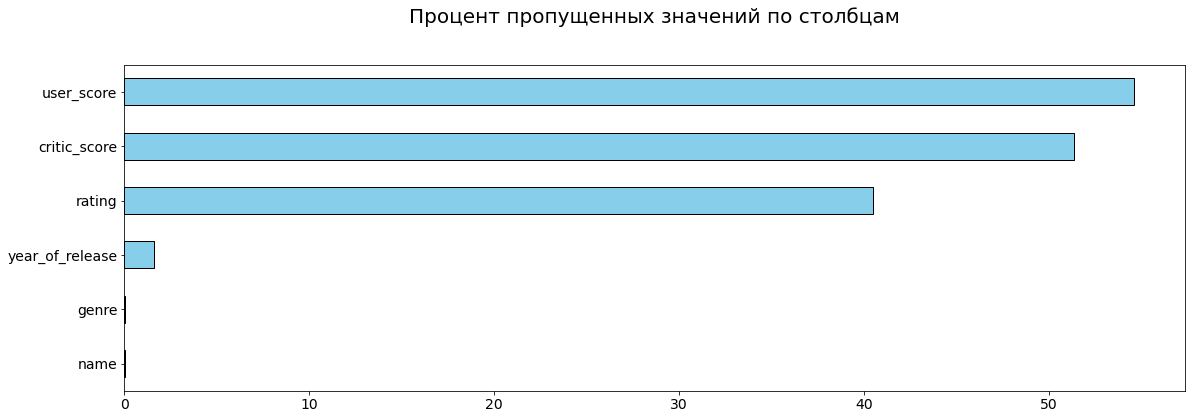

In [12]:
pass_value_barh(data)

Столбцы, которые содержат оценки пользователй и критиков оказались с наибольшим количеством пропусков. Их не представляется возможность заполнить, так как каждая игра имеет свои плюсы и минусы. Заполнение, например, средним значением приведёт к потере важной информации. Причиной возникновения пропусков могло быть то, что игра вышла недавно и не получила достаточно оценок, или же она не популярна.

В столбце `rating` неизвестные значения можно заполнть заглушкой ('unknown'). Создание отдельной категории не внесёт искажений и позволит учесть игры без рейтинга. В данном столбце пропуски могли появиться из-за того, что игры могли быть выпущены в тех регионах, где рейтинг ESRB не учитывается.

In [13]:
data['rating'] = data['rating'].cat.add_categories('unknown')
data['rating'] = data['rating'].fillna('unknown')

Пропусков в столбце `years_of_release` достатоно много (256), но мы не можем их заменить на какие-либо значения. Год игры не зависит от её названия, типа или рейтинга. Можно определить лишь примерный диапазон по платформе, но разброс будет большой. Пропуски могли появиться из-за того, что игра была слишком старой и непопулярной, не было точной информации о годе ее создания.

В столбцах `name` и `genre` всего по 2 пропуска. Их можно удалить, это не исказит данные.

In [14]:
data = data.dropna(subset=['name', 'genre'])

Аббревиатуру 'tbd' (to be determined) означает, что оценка пользователя ещё не была определена, я заменил её в пункте 2.2 на NaN.

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

##### Посчитаем суммарные продажи во всех регионах

In [16]:
data['gl_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [17]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,gl_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [18]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           16713 non-null  category
 11  gl_sales         16713 non-null  float64 
dtypes: Int64(1), category(1), float64(7), object(3)
memory usage: 1.6+ MB


In [19]:
duplicate_count = data.duplicated().sum()
print(f"Количество дубликатов: {duplicate_count}")

Количество дубликатов: 0


In [20]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()

key_columns = ['name', 'platform', 'year_of_release']

duplicate_rows = data[data.duplicated(subset=key_columns, keep='first')]
print(f"Количество дубликатов: {len(duplicate_rows)}")

data = data.drop_duplicates(subset=key_columns, keep='first').reset_index(drop=True)
print(f"Количество записей после удаления дубликатов: {len(data)}")

Количество дубликатов: 1
Количество записей после удаления дубликатов: 16712


В рамках предобработки данных были изменены типы данных для оптимизации использования памяти и удобства дальнейшего анализа. Были изучены пропуски в ключевых столбцах, при этом особое внимание уделено оценкам пользователей и критиков, а также рейтингу игр, так как заполнение пропусков могло бы исказить исходную информацию. Пропуски в столбце rating были заменены на заглушку 'unknown', а незначительные пропуски в столбцах name и genre удалены. Аббревиатура 'tbd' была заменена на NaN для корректной обработки оценок пользователей. Также данные были проверены на наличие дубликатов, найденный дубликат был удалён, чтобы очистить данные и повысить их качество.

#### Шаг 3. Исследовательский анализ данных

##### Посмотрим, сколько игр выпускалось в разные годы

In [21]:
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Text(0.5, 1.0, 'Диаграмма размаха значений года релиза')

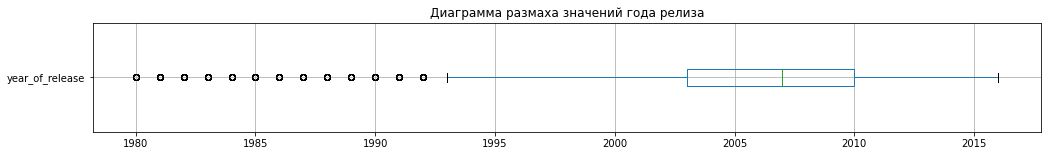

In [22]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['year_of_release']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений года релиза')

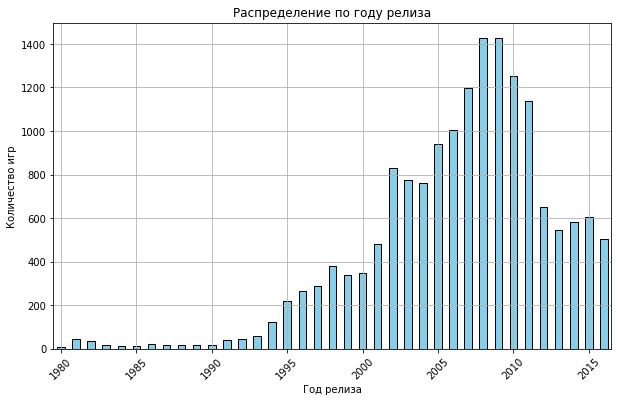

In [60]:
games_per_year = data['year_of_release'].value_counts().sort_index()

data_plot_year = games_per_year.plot(title='Распределение по году релиза', kind='bar', grid=True, 
                                      figsize=(10, 6), color='skyblue', edgecolor='black')

data_plot_year.set_xlabel('Год релиза')
data_plot_year.set_ylabel('Количество игр')
xticks_labels = games_per_year.index
xticks_positions = range(len(xticks_labels))
data_plot_year.set_xticks(xticks_positions[::5])  
data_plot_year.set_xticklabels(xticks_labels[::5], rotation=45)
plt.show()

Большинство игр было выпущено с 1995 года по 2016. Поэтому данные за более ранние периоды для нас неважны.

##### Посмотрим, как менялись продажи по платформам. 

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds']


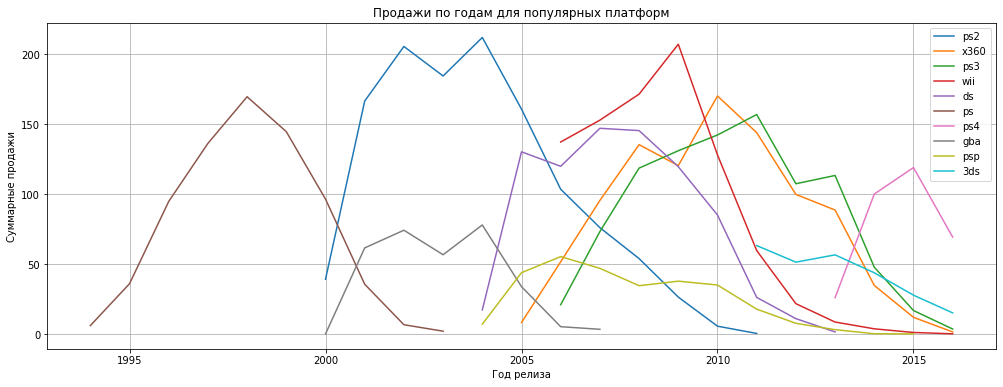

In [24]:
data = data[~((data['platform'] == 'ds') & (data['year_of_release'] < 2004))]
sales_top_platform = data.groupby(['year_of_release', 'platform'])['gl_sales'].sum().reset_index()

top_platforms = sales_top_platform.groupby('platform')['gl_sales'].sum().nlargest(10).index.tolist()
print(top_platforms)

data_top_platforms = sales_top_platform[sales_top_platform['platform'].isin(top_platforms)]


plt.figure(figsize=(17, 6))
for platform in top_platforms:
    plt_data = data_top_platforms[data_top_platforms['platform'] == platform]
    plt.plot(plt_data['year_of_release'], plt_data['gl_sales'], label=platform)  

plt.title('Продажи по годам для популярных платформ')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.grid()
plt.show()

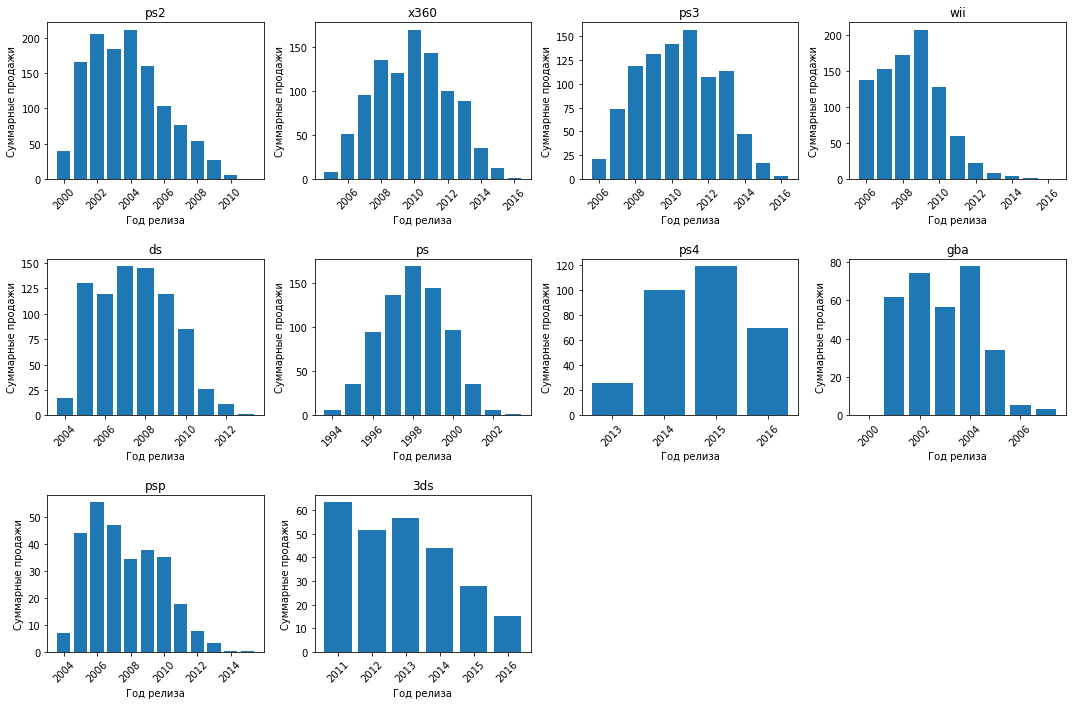

In [25]:
plt.figure(figsize=(15, 10))
for i, platform in enumerate(top_platforms, start=1):
    plt_data = data_top_platforms[data_top_platforms['platform'] == platform]
    plt.subplot(3, 4, i) 
    plt.bar(plt_data['year_of_release'], plt_data['gl_sales'])
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Суммарные продажи')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Лучше всего продавались игры на платформах: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. В основном платформы оставались актуальными 10 лет с момента своего появления на рынке.

##### Поиск потенциально прибольной платформы в актуальный период

На основе предыдущих исследований можно выбрать актуальным период с 2013 по 2016 год. Данный диапазон будет охватывать большое количество игр на современных платформах и не учитывать неактуальные платформы и игры.

In [26]:
data_relevant = data[data['year_of_release'].between(2013, 2016)]

['ps4', 'ps3', 'xone', '3ds', 'x360', 'wiiu', 'pc', 'psv', 'wii', 'psp']


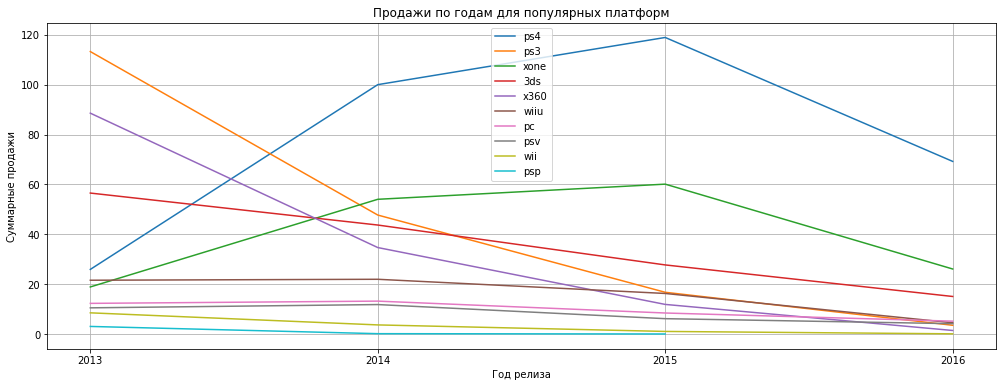

In [27]:
sales_top_platform = data_relevant.groupby(['year_of_release', 'platform'])['gl_sales'].sum().reset_index()

top_platforms = sales_top_platform.groupby('platform')['gl_sales'].sum().nlargest(10).index.tolist()
print(top_platforms)

data_top_platforms = sales_top_platform[sales_top_platform['platform'].isin(top_platforms)]

plt.figure(figsize=(17, 6))
for platform in top_platforms:
    plt_data = data_top_platforms[data_top_platforms['platform'] == platform]
    plt.plot(plt_data['year_of_release'], plt_data['gl_sales'], label=platform)  
    
plt.xticks(ticks=range(2013, 2017), labels=[2013, 2014, 2015, 2016])
plt.title('Продажи по годам для популярных платформ')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.grid()
plt.show()

За данный период лидируют платформы PS4, PS3 и XOne. Особый интерес представляют PS4 и XOne, поскольку они показывают значительный рост продаж в период с 2013 по 2015 годы. Снижение продаж в 2016 году, вероятно, обусловлено тем, что декабрьские данные могут быть ещё не учтены, что является важным фактором, влияющим на общую картину. Потенциально прибыльными платформами можно считать PS4 и XOne, особенно с учётом ожидаемых завершений продажных циклов в праздничный сезон.

Кроме того, стоит упомянуть, что даже при падении продаж 3DS остаётся востребованной, поскольку её объёмы реализации всё ещё составляют около 15-20 млн копий, что открывает возможности для значительных доходов. Игры на PC можно также включить в рекомендации, поскольку их долгая история, насчитывающая более 30 лет, указывает на стабильный интерес аудитории.

##### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

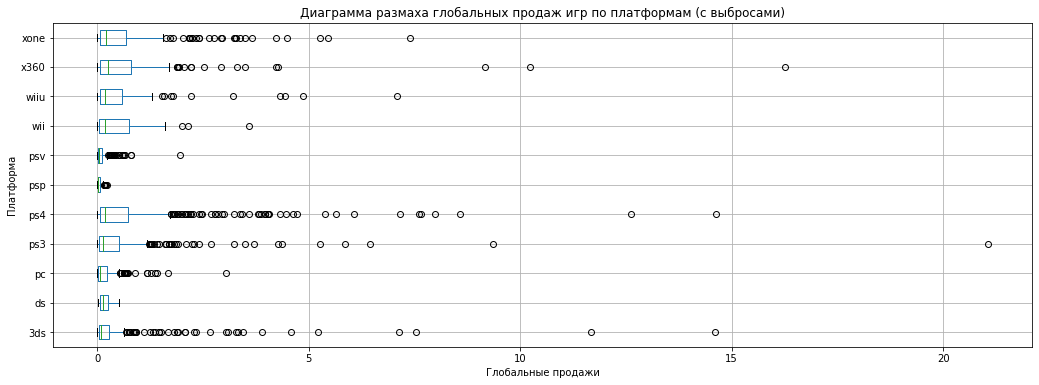

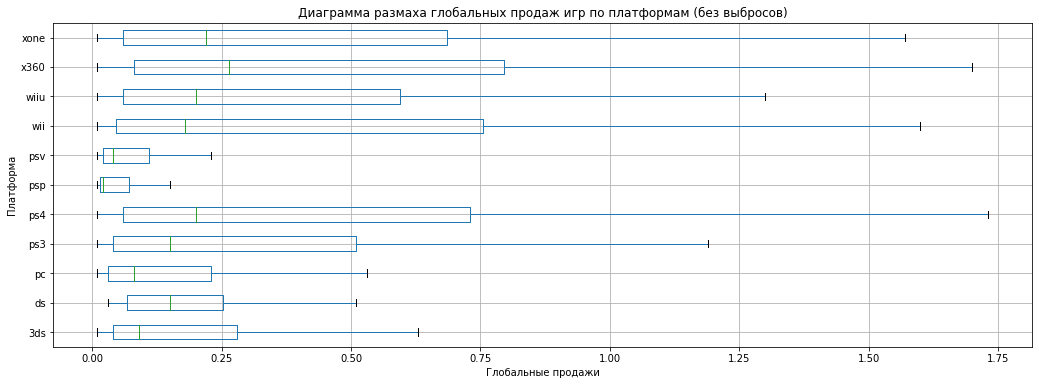

In [28]:
fig, ax = plt.subplots(figsize=(17, 6))
ax = data_relevant.boxplot(column='gl_sales', by='platform', ax=ax, vert=False, showfliers=True)
ax.set_title('Диаграмма размаха глобальных продаж игр по платформам (с выбросами)')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel('Платформа')
plt.suptitle('') 
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
ax = data_relevant.boxplot(column='gl_sales', by='platform', ax=ax, vert=False, showfliers=False)
ax.set_title('Диаграмма размаха глобальных продаж игр по платформам (без выбросов)')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel('Платформа')
plt.suptitle('') 
plt.show()

На диаграмме размаха мы видим, что медианные значения достаточно близки у следующих платформ:XOne, X360, WiiU, Wii, PS4, PS3 и ds (отстают больше других, но все же близко).

У платформы 3DS, из топ-продаж, медианные продажи низкие. Это происходит из-за выбросов (топовые игры, благодаря которым платформа может вырваться в лидеры по количеству продаж).

##### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков 

Возьмем самую перспективную и одну из самых попярных платформ - PS4.

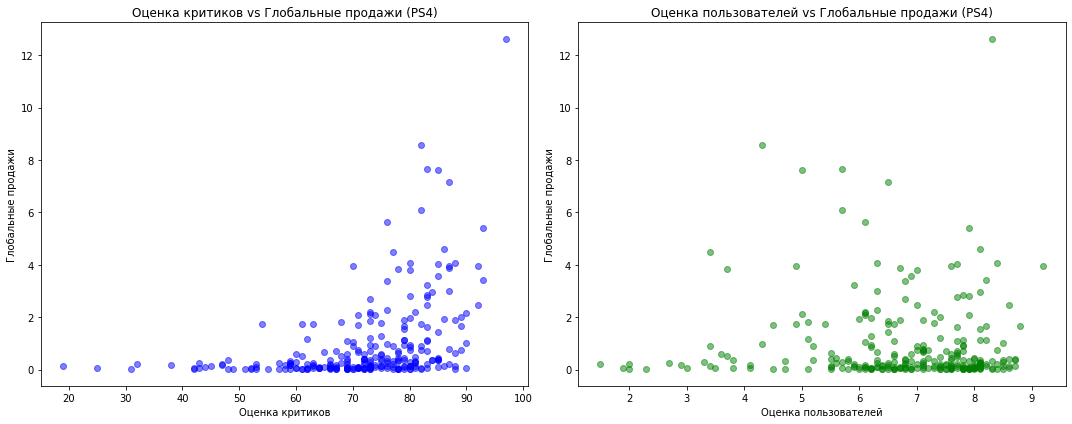

Коэффициент корреляции между оценками критиков и глобальными продажами: 0.41
Коэффициент корреляции между оценками пользователей и глобальными продажами: -0.03


In [29]:
platform_data = data_relevant[data_relevant['platform'] == 'ps4']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(platform_data['critic_score'], platform_data['gl_sales'], alpha=0.5, color='blue')
plt.title('Оценка критиков vs Глобальные продажи (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')

plt.subplot(1, 2, 2)
plt.scatter(platform_data['user_score'], platform_data['gl_sales'], alpha=0.5, color='green')
plt.title('Оценка пользователей vs Глобальные продажи (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи')

plt.tight_layout()
plt.show()

corr_total_1 = platform_data['critic_score'].corr(platform_data['gl_sales'])
print(f"Коэффициент корреляции между оценками критиков и глобальными продажами: {corr_total_1:.2f}")

corr_total_2 = platform_data['user_score'].corr(platform_data['gl_sales'])
print(f"Коэффициент корреляции между оценками пользователей и глобальными продажами: {corr_total_2:.2f}")

Корреляция между оценками критиков и глобальными продажами составляет 0.41, что указывает слабую положительную связь. Это означает, что более высокие оценки критиков в некоторой степени связаны с большими продажами. Однако хотя отзывы критиков и влияют на продажи, они не являются единственным или доминирующим фактором.

Положительная корреляция с оценками критиков может указывать на то, что рецензии профессионалов играют роль в формировании интереса к игре, особенно при ее релизе. Это может быть связано с тем, что оценки критиков часто публикуются раньше и могут повлиять на первые впечатления потребителей.

Корреляция между оценками пользователей и глобальными продажами составляет -0.03, она практически отсутствует. Это свидетельствует об отсутствии зависимости между оценками пользователей и глобальными продажами. Продажи могут быть как высокими, так и низкими, независимо от того, какие оценки оставляют пользователи.

Мнение пользователей чаще появляется позже и оказывает меньшее влияние на начальные продажи. Также стоит учитывать, что пользователи могут иметь более разнообразные предпочтения и критерии оценки.

##### Соотнесем выводы с продажами игр на других платформах

Коэффициент корреляции между оценками критиков и глобальными продажами для PS3: 0.33
Коэффициент корреляции между оценками пользователей и глобальными продажами для PS3: 0.00
Коэффициент корреляции между оценками критиков и глобальными продажами для XOne: 0.42
Коэффициент корреляции между оценками пользователей и глобальными продажами для XOne: -0.07


Text(0, 0.5, 'Глобальные продажи')

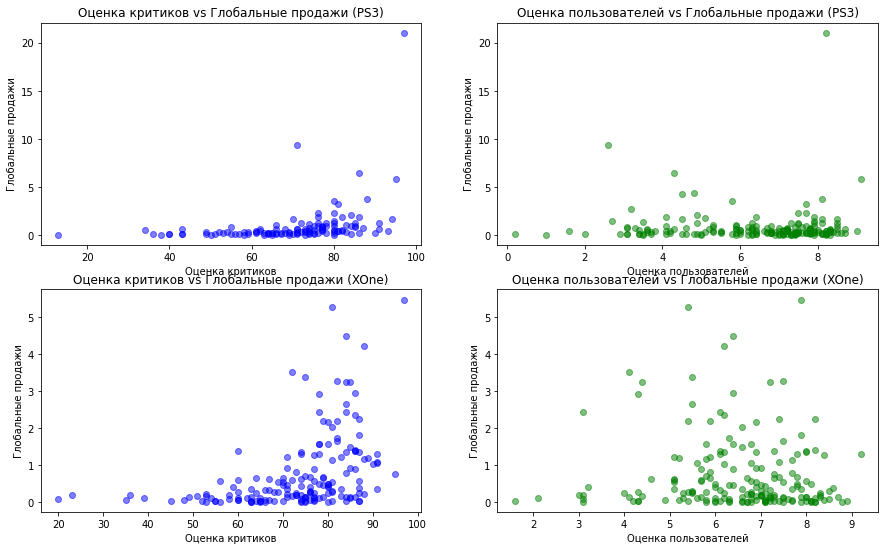

In [30]:
platform_data_ps_3 = data_relevant[data_relevant['platform'] == 'ps3']
platform_data_XOne = data_relevant[data_relevant['platform'] == 'xone']

corr_total_3 = platform_data_ps_3['critic_score'].corr(platform_data_ps_3['gl_sales'])
print(f"Коэффициент корреляции между оценками критиков и глобальными продажами для PS3: {corr_total_3:.2f}")

corr_total_4 = platform_data_ps_3['user_score'].corr(platform_data_ps_3['gl_sales'])
print(f"Коэффициент корреляции между оценками пользователей и глобальными продажами для PS3: {corr_total_4:.2f}")

corr_total_5 = platform_data_XOne['critic_score'].corr(platform_data_XOne['gl_sales'])
print(f"Коэффициент корреляции между оценками критиков и глобальными продажами для XOne: {corr_total_5:.2f}")

corr_total_6 = platform_data_XOne['user_score'].corr(platform_data_XOne['gl_sales'])
print(f"Коэффициент корреляции между оценками пользователей и глобальными продажами для XOne: {corr_total_6:.2f}")

plt.figure(figsize=(15, 9))

plt.subplot(2, 2, 1)
plt.scatter(platform_data_ps_3['critic_score'], platform_data_ps_3['gl_sales'], alpha=0.5, color='blue')
plt.title('Оценка критиков vs Глобальные продажи (PS3)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')

plt.subplot(2, 2, 2)
plt.scatter(platform_data_ps_3['user_score'], platform_data_ps_3['gl_sales'], alpha=0.5, color='green')
plt.title('Оценка пользователей vs Глобальные продажи (PS3)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи')

plt.subplot(2, 2, 3)
plt.scatter(platform_data_XOne['critic_score'], platform_data_XOne['gl_sales'], alpha=0.5, color='blue')
plt.title('Оценка критиков vs Глобальные продажи (XOne)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')

plt.subplot(2, 2, 4)
plt.scatter(platform_data_XOne['user_score'], platform_data_XOne['gl_sales'], alpha=0.5, color='green')
plt.title('Оценка пользователей vs Глобальные продажи (XOne)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи')

Прогнозируется рост продаж только на платформах PS4 и XOne, они самые прибыльные на актуальном периоде, некоторое более старые платформы еще продаются, но их доля на рынке уменьшается. Для основных платформ наблюдается закономерность, что на глобальные продажи влияют только отзывы критиков, отзывы пользователей практически не влияют.

##### Посмотрите на общее распределение игр по жанрам 

In [31]:
genre_counts = data_relevant['genre'].value_counts()
genre_counts

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [32]:
genre_sales = data_relevant.groupby('genre')['gl_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: gl_sales, dtype: float64

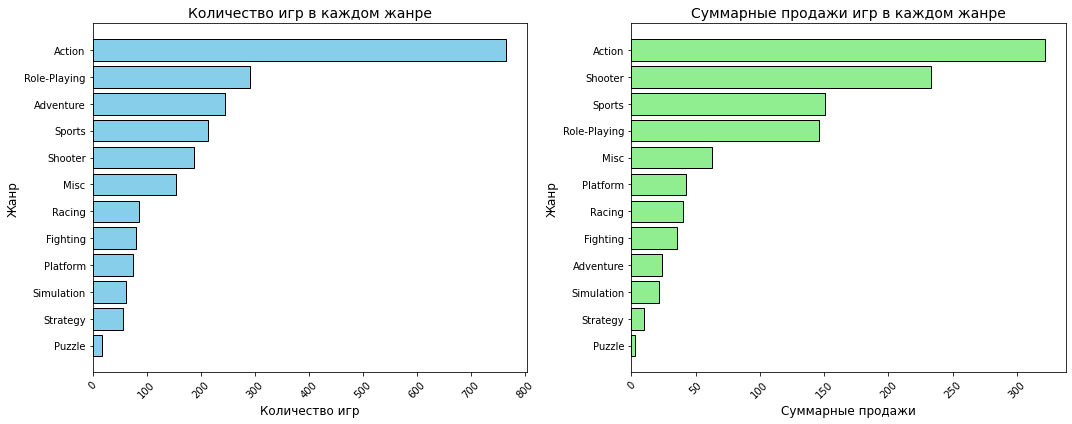

In [33]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.barh(genre_counts.index, genre_counts.values, color='skyblue', edgecolor='black')
plt.title('Количество игр в каждом жанре', fontsize=14)
plt.ylabel('Жанр', fontsize=12)
plt.xlabel('Количество игр', fontsize=12)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(genre_sales.index, genre_sales.values, color='lightgreen', edgecolor='black')
plt.title('Суммарные продажи игр в каждом жанре', fontsize=14)
plt.ylabel('Жанр', fontsize=12)
plt.xlabel('Суммарные продажи', fontsize=12)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

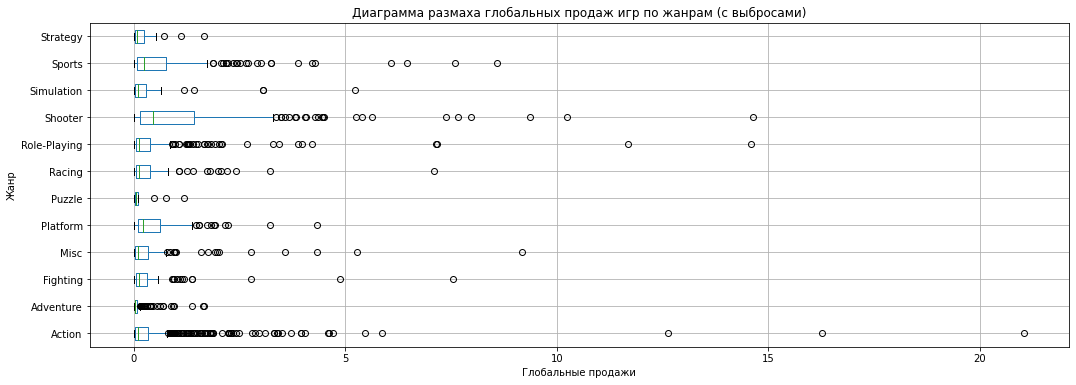

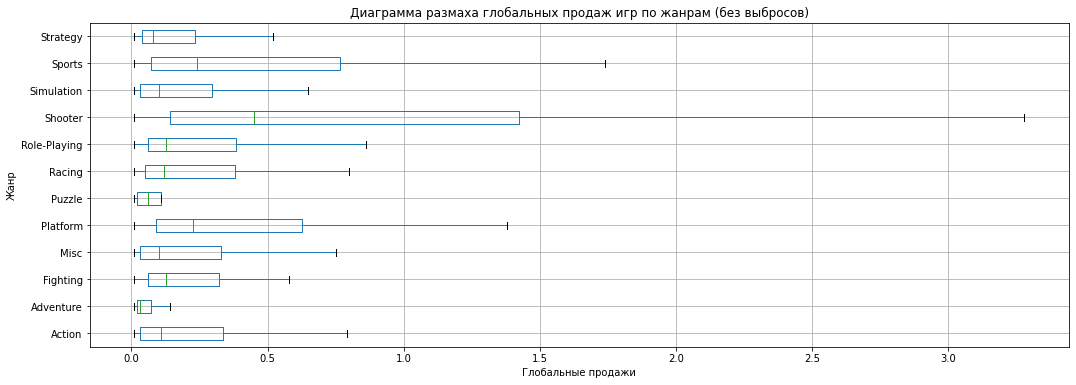

In [34]:
fig, ax = plt.subplots(figsize=(17, 6))
ax = data_relevant.boxplot(column='gl_sales', by='genre', ax=ax, vert=False, showfliers=True)
ax.set_title('Диаграмма размаха глобальных продаж игр по жанрам (с выбросами)')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel('Жанр')
plt.suptitle('') 
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
ax = data_relevant.boxplot(column='gl_sales', by='genre', ax=ax, vert=False, showfliers=False)
ax.set_title('Диаграмма размаха глобальных продаж игр по жанрам (без выбросов)')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel('Жанр')
plt.suptitle('') 
plt.show()

Больше всего игр было выпущено в жанре Action,с большим отрывом от других жанров. За ним следуют жанры Role-Playing и Adventure, которые также представлены достаточно широко. Жанры такие как Puzzle и Strategy имеют гораздо меньшее количество игр. 

Жанр Action не только самый популярный по количеству игр, но и занимает лидирующую позицию по суммарным продажам. Жанры Shooter и Sports также показывают высокие продажи, несмотря на меньшее количество игр по сравнению с жанром Action. Жанры Puzzle и Strategy, которые были наименее распространены по количеству игр, демонстрируют низкие суммарные продажи.

Наибольшая медианная продажа зафиксирована в жанре `Shooter`, кроме этого высокие медианные продажи в жанрах `Sports` и `Platform`. В жанре `Action` большое количество выбросов (очень успешных игр), но медиана не высока.

#### Шаг 4. Портрет пользователя каждого региона

##### Определим для пользователя каждого региона cамые популярные платформы (топ-5)

In [35]:
def top_platforms_by_region(data, region, top_n=5):
    platform_sales = data.groupby('platform')[f'{region}_sales'].sum().sort_values(ascending=False)
    return platform_sales.head(top_n)

def sales_share(data, region):
    total_sales = data[f'{region}_sales'].sum()
    platform_sales = data.groupby('platform')[f'{region}_sales'].sum()
    platform_share = (platform_sales / total_sales) * 100
    return platform_share.sort_values(ascending=False).head()

print("Топ-5 платформ по продажам в NA:")
print(top_platforms_by_region(data_relevant, 'na'))

print("\nДоли продаж платформ в NA:")
print(sales_share(data_relevant, 'na'))

print("\nТоп-5 платформ по продажам в EU:")
print(top_platforms_by_region(data_relevant, 'eu'))

print("\nДоли продаж платформ в EU:")
print(sales_share(data_relevant, 'eu'))

print("\nТоп-5 платформ по продажам в JP:")
print(top_platforms_by_region(data_relevant, 'jp'))

print("\nДоли продаж платформ в JP:")
print(sales_share(data_relevant, 'jp'))

Топ-5 платформ по продажам в NA:
platform
ps4     108.74
xone     93.12
x360     81.66
ps3      63.50
3ds      38.20
Name: na_sales, dtype: float64

Доли продаж платформ в NA:
platform
ps4     24.842933
xone    21.274360
x360    18.656188
ps3     14.507322
3ds      8.727239
Name: na_sales, dtype: float64

Топ-5 платформ по продажам в EU:
platform
ps4     141.09
ps3      67.81
xone     51.59
x360     42.52
3ds      30.96
Name: eu_sales, dtype: float64

Доли продаж платформ в EU:
platform
ps4     35.971241
ps3     17.288326
xone    13.152997
x360    10.840578
3ds      7.893328
Name: eu_sales, dtype: float64

Топ-5 платформ по продажам в JP:
platform
3ds     67.81
ps3     23.35
psv     18.59
ps4     15.96
wiiu    10.88
Name: jp_sales, dtype: float64

Доли продаж платформ в JP:
platform
3ds     48.167353
ps3     16.586163
psv     13.205001
ps4     11.336838
wiiu     7.728371
Name: jp_sales, dtype: float64


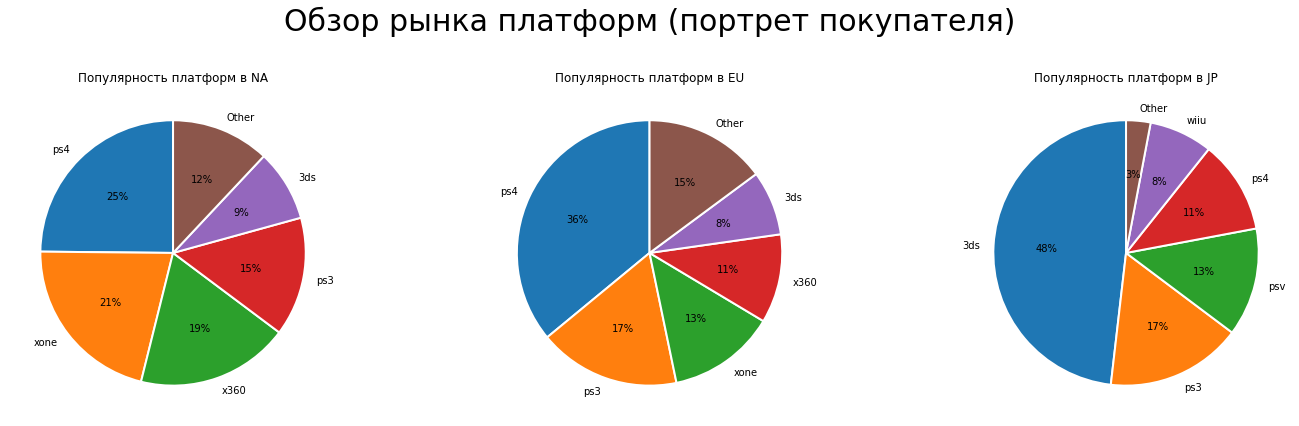

In [36]:
def plot_top5_platforms_by_region(data, top_n=5):
    regions = ['na', 'eu', 'jp']
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=30)

    for i, region in enumerate(regions):
        platform_sales = data.groupby('platform')[f'{region}_sales'].sum()
        top_platforms = platform_sales.sort_values(ascending=False).head(top_n)
        other_sales = platform_sales.sum() - top_platforms.sum()
         
        platforms = top_platforms.index.tolist() + ['Other']
        sales = top_platforms.tolist() + [other_sales]

        axs[i].pie(
            sales,
            labels=platforms,
            autopct='%1.0f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2} 
        )
        axs[i].set_title(f'Популярность платформ в {region.upper()}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_top5_platforms_by_region(data_relevant)

В Северной Америке и Европе лидирует PS4, в Японии - 3DS. В целом рынок Северной Америки и Европы достаточно похож, выделяется толькл Япония, где почти 50% занимает 3DS.

##### Определим самые популярные жанры (топ-5)

In [37]:
def top_genre_by_region_sale(data, region, top_n=5):
    genre_sales = data.groupby('genre')[f'{region}_sales'].sum().sort_values(ascending=False)
    return genre_sales.head(top_n)

print("Топ-5 жанров по продажам в NA:")
print(top_genre_by_region_sale(data_relevant, 'na'))

print("\nТоп-5 жанров по продажам в EU:")
print(top_genre_by_region_sale(data_relevant, 'eu'))

print("\nТоп-5 жанров по продажам в JP:")
print(top_genre_by_region_sale(data_relevant, 'jp'))

Топ-5 жанров по продажам в NA:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Топ-5 жанров по продажам в EU:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Топ-5 жанров по продажам в JP:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


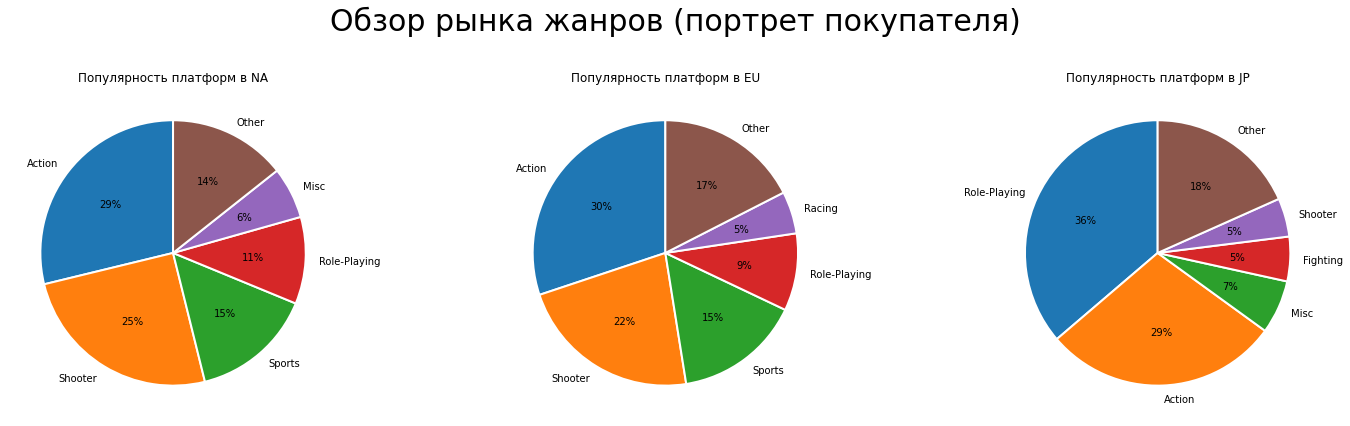

In [38]:
def plot_top5_genre_by_region(data, top_n=5):
    regions = ['na', 'eu', 'jp']
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize=30)

    for i, region in enumerate(regions):
        genre_sales = data.groupby('genre')[f'{region}_sales'].sum()
        top_genre = genre_sales.sort_values(ascending=False).head(top_n)
        other_sales = genre_sales.sum() - top_genre.sum()
         
        genre = top_genre.index.tolist() + ['Other']
        sales = top_genre.tolist() + [other_sales]

        axs[i].pie(
            sales,
            labels=genre,
            autopct='%1.0f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2} 
        )
        axs[i].set_title(f'Популярность платформ в {region.upper()}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_top5_genre_by_region(data_relevant)

Самые прибыльные жанры для Северной Америки и Европы практически одинаковы. Сильно отличается Япония, так как на первом месте у них Role-Playing.

##### Определим влияние  рейтинга ESRB на продажи в отдельных регионах

In [39]:
def esrb_sales(data, region):
    esrb_sales = data.groupby('rating')[f'{region}_sales'].sum()
    return esrb_sales.sort_values(ascending=False)

print("\nПродажи по рейтингам ESRB в NA:")
print(esrb_sales(data_relevant, 'na'))

print("\nПродажи по рейтингам ESRB в EU:")
print(esrb_sales(data_relevant, 'eu'))

print("\nПродажи по рейтингам ESRB в JP:")
print(esrb_sales(data_relevant, 'jp'))  


Продажи по рейтингам ESRB в NA:
rating
M          165.21
unknown     89.42
E           79.05
E10+        54.24
T           49.79
AO           0.00
EC           0.00
K-A          0.00
RP           0.00
Name: na_sales, dtype: float64

Продажи по рейтингам ESRB в EU:
rating
M          145.32
E           83.36
unknown     78.91
E10+        42.69
T           41.95
AO           0.00
EC           0.00
K-A          0.00
RP           0.00
Name: eu_sales, dtype: float64

Продажи по рейтингам ESRB в JP:
rating
unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
AO          0.00
EC          0.00
K-A         0.00
RP          0.00
Name: jp_sales, dtype: float64


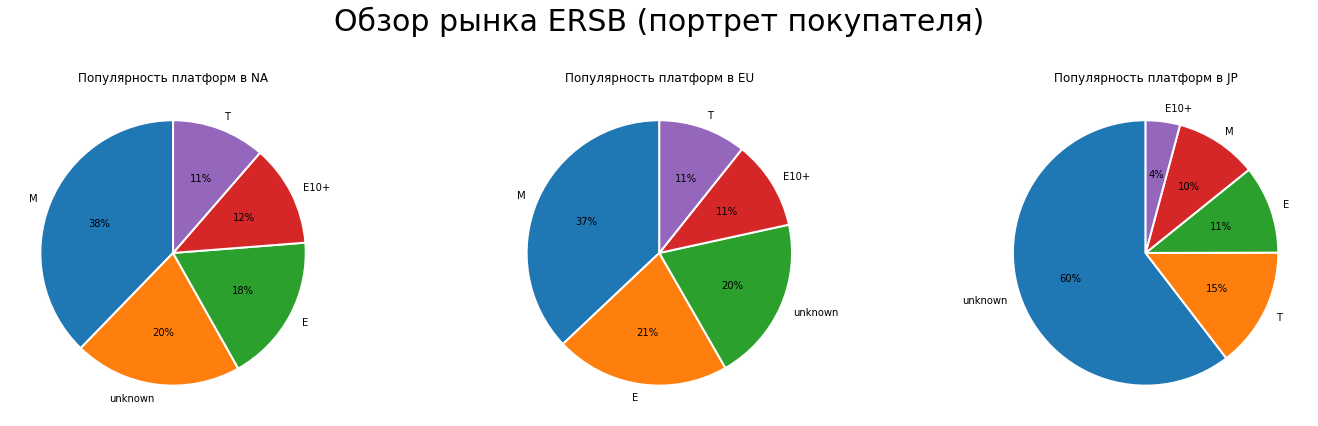

In [40]:
def plot_esrb_sales_region(data, top_n=5):
    regions = ['na', 'eu', 'jp']
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Обзор рынка ERSB (портрет покупателя)', fontsize=30)

    for i, region in enumerate(regions):
        ersb_sales = data.groupby('rating')[f'{region}_sales'].sum()
        top_ersb = ersb_sales.sort_values(ascending=False).head(top_n)
        
         
        ersb = top_ersb.index.tolist() 
        sales = top_ersb.tolist() 

        axs[i].pie(
            sales,
            labels=ersb,
            autopct='%1.0f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2} 
        )
        axs[i].set_title(f'Популярность платформ в {region.upper()}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_esrb_sales_region(data_relevant)

Игры с рейтингом M доминируют в Северной Америке и Европе. Японский рынок значительно отличается: продажи игр с неизвестным рейтингом (unknown) лидируют, что может быть связано с локальными особенностями классификации игр. Игры с рейтингом M не так популярны, что свидетельствует о различиях в предпочтениях аудитории.

#### Шаг 5. Проверка гипотез

##### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H0): средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза (H1): средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [41]:
#Так как в данных NaN, то статистические функции (такие как t-тест) не смогут правильно выполнить расчёты,
#что приведет к ошибкам или некорректным результатам
XOne_ratings = data_relevant[(data_relevant['platform'] == 'xone')]['user_score'].dropna()
pc_ratings = data_relevant[(data_relevant['platform'] == 'pc')]['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(XOne_ratings, pc_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Недостаточно статистических оснований для отклонения нулевой гипотезы, которая утверждает, что средние пользовательские рейтинги на платформах Xbox One и PC равны. Различие между ними не является статистически значимым.

##### Гипотеза 2: cредние пользовательские рейтинги жанров Action  и Sports  разные.

Нулевая гипотеза (H0): cредние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза (H1): cредние пользовательские рейтинги жанров Action и Sports различаются.

In [42]:
action_ratings = data_relevant[(data_relevant['genre'] == 'Action')]['user_score'].dropna()
sports_ratings = data_relevant[(data_relevant['genre'] == 'Sports')]['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Среднии рейтинги жанров действительно различаются. Жанры Action и Sports имеют существенно разные средние пользовательские рейтинги, и это различие значимо с точки зрения статистики.

**Две наши гипотезы являлись двусторонними, так как нам важен только факт различия пользовательских рейтингов. Нулевая гипотеза утверждает отсутствие различий или эффекта. Это позволяет использовать объективный критерий, чтобы проверить, есть ли достаточные доказательства в данных для её опровержения. Альтернативная гипотеза формируется, как противоречие нулевой.**

**От выбора уровня статистической значимости зависит, как далеко должно оказаться наблюдаемое значение от предполагаемого в нулевой гипотезе, чтобы отвергнуть её. Конвенциональные значения — 1%, 5%. Для данных гипотез я выбрал 5%, так как такой уровень считается достаточно низким и позволяет получить уверенные результаты, но не так строгим, чтобы сделать исследование трудным.**

**Для проверки гипотез был применен t-тест, так как нам нужно было сравнить средние значения двух независимых выборок. Парметр `equal_var=False`, так как выборки у нас разного размера.**

#### Шаг 6. Общий вывод

В рамках данного анализа были исследованы исторические данные о продажах игр, оценках пользователей и критиков, жанрах и платформах с целью выявления закономерностей, определяющих успешность игр. Это позволит эффективно планировать рекламные кампании и делать ставку на потенциально популярные продукты.

Важно отметить, что большинство игр было выпущено в период с 1995 по 2016 год, и мы сосредоточились на актуальном временном интервале с 2013 по 2016 год. Это позволило избежать учета устаревших платформ и игр. 

Наиболее успешные платформы: PS4, XOne. Особенно выделяются PS4 и XOne, которые показали рост продаж в период с 2013 по 2015 годы. При этом PS4, как наиболее перспективная платформа, демонстрирует наибольшую медиану продаж. Также стоит отметить 3DS и PC. 3DS хоть и показывает спад продаж, но до сих пор остаётся востребованной, поскольку её объёмы реализации всё ещё составляют около 15-20 млн копий, что открывает возможности для значительных доходов (стоит учесть, что она наиболее популярна на Японском рынке, на других рынках она менее востребована). Игры на PC можно также включить в рекомендации, поскольку их долгая история, насчитывающая более 30 лет, указывает на стабильный интерес аудитории.

Анализ показал положительную корреляцию между оценками критиков и продажами, что свидетельствует о влиянии рецензий на начальный интерес к играм. Однако корреляция между оценками пользователей и продажами практически отсутствует, что указывает на меньшую значимость мнения пользователей.

Жанр Action доминирует как по количеству выпущенных игр, так и по общим продажам. Жанры Role-Playing и Adventure также представлены широко, в то время как жанры Puzzle и Strategy имеют меньшую долю на рынке. В Японии наблюдается явное преимущество жанра Role-Playing.

В Северной Америке и Европе на рынке доминирует платформа PS4, в то время как в Японии лидирует 3DS. При этом наблюдается схожесть между рынками Северной Америки и Европы, в отличие от японского рынка.

Первая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не была опровергнута. Статистические данные не предоставили оснований для отклонения нулевой гипотезы. Иными словами, вероятно, что средние пользовательские рейтинги платформ равны.

Вторая гипотеза касалась различий в средних пользовательских рейтингах жанров Action и Sports. Наш анализ выявил значительное расхождение между ними, что маловероятно произошло бы случайно, если бы средние рейтинги действительно были одинаковыми. Это указывает на то, что жанры оцениваются по-разному. Наши данные гипотезе не противоречат, мы ее не отвергаем.

Таким образом, анализ подтвердил важность оценки критиков для успешных продаж, а также выявил ключевые различия в предпочтениях игроков в зависимости от региона.